<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## **DBSCAN Implementation**


Parse training data

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances as dist

In [ ]:
def parse_data (infile, columns) -> np.array : 
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()[1:]

  dataset = []
  for line in lines:
    if line:
      features = line.split(',')
      datapoint_vector = []
      for c in columns:
        feature = float(features[c].strip('\'').strip('\"'))      
        datapoint_vector.append(feature)
          
      dataset.append(datapoint_vector)

  return np.array(dataset)

Neighbour Discovery with $O(n^2)$ complexity

In [ ]:
def neighbours_discovery(dataset, epsilon) -> list :
  # distances matrix should be len(dataset) by len(dataset)
  distances = dist(dataset, dataset)
  # neigbours is a list of all neighbours 
  neighbours = []
  for i in range(dataset.shape[0]):
    data_i_neighbours = []
    for j in range(dataset.shape[0]):
      if distances[i][j] < epsilon:
        data_i_neighbours.append(j)
    neighbours.append(data_i_neighbours)
  return [distances, neighbours]

Use BFS to cluster

In [ ]:
def bfs_dbscan ( neighbours, minPT) -> dict:
  scan ={
        'clusters': [], # a list of a list of datapoints
        'visited': set(), # a new set
        'noise': set() # non-leaf datapoints that don't have enough neighbours
    }  
  queue = set()
  visited = scan['visited']
  clusters = scan['clusters']
  noise = scan['noise']

  while (len(visited) != len(neighbours)):
    start = next(iter(set(range(0, len(neighbours))) - visited))
    queue.add(start)
    cluster = set()

    while (len(queue)!= 0):
      node = queue.pop()
      visited.add(node) ; cluster.add(node)
      for n in neighbours[node]:
        if (len(neighbours[n])>=minPT and (n not in visited)): 
          queue.add(n)
        else: 
          visited.add(n) ; cluster.add(n)
      if (len(queue) == 0 and len(cluster)>1) : clusters.append(cluster)
      elif (len(queue) == 0 and len(cluster)==1) : noise.update(cluster)

  return scan

Find Gini Coefficient on Clusters

In [ ]:

def find_gini (target: np.array, clusters : list) -> list :
  cluster_label_roster = []
  for cluster in clusters:
    temp = list(cluster)
    cluster_label_roster.append(temp)

  gini = []

  clusters_actual_labels = []
  for cluster in clusters:
    actual_labels = []
    for x_i in cluster:
      actual_labels.append(target[x_i])
    clusters_actual_labels.append(actual_labels)
    
  for i in range(len(cluster_label_roster)):
    cluster_gini = 0
    for index in cluster_label_roster[i]:
      cluster_gini = cluster_gini + ((clusters_actual_labels[i].count(index)/len(clusters[i])) ** 2) 
    cluster_gini = 1 -  cluster_gini
    gini.append(cluster_gini)

  return gini

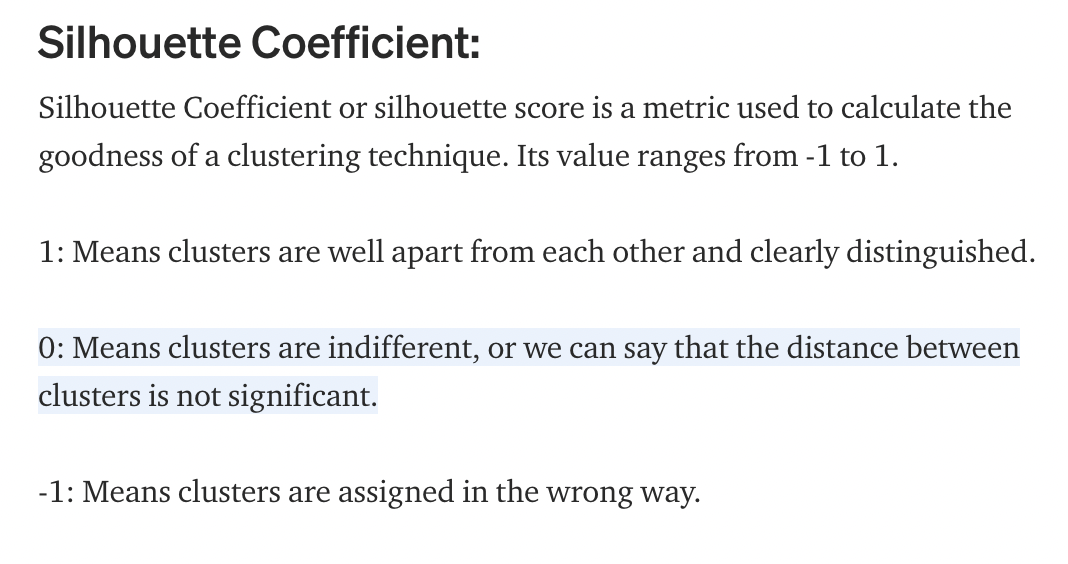

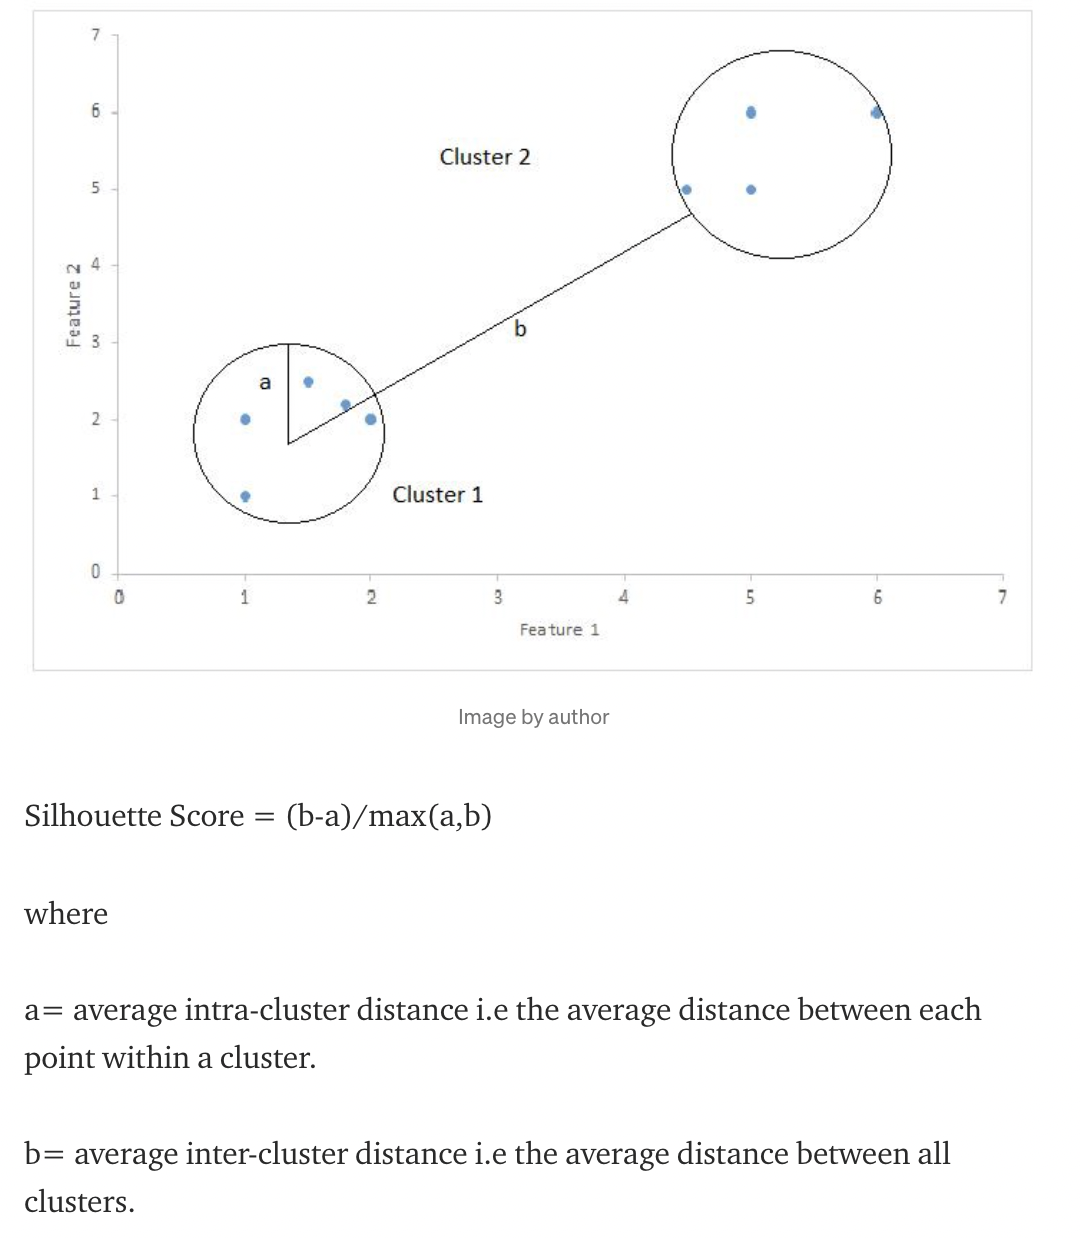

Citation of Credit: The above material is created Ashutosh Bhardwaj

The Original source of the material : https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [ ]:
def find_silhouette (clusters: np.ndarray, dataset: np.ndarray) -> list:
  avg_intra_dis = []
  mu_data = []
  for cluster in clusters:
    cluster_data = []
    for x_i in cluster:
      cluster_data.append(dataset[x_i])
    avg_intra_dis.append(np.mean(dist(cluster_data)))
    mu_data.append(np.mean(cluster_data,axis = 0))


  extern_cluster_dist = dist(mu_data)
  silhouette = []
  for x_i in range(len(clusters)):
    numerator = np.sum(extern_cluster_dist[x_i]) - avg_intra_dis[x_i]
    denominator = np.max([np.sum(extern_cluster_dist[x_i]), avg_intra_dis[x_i]])
    silhouette.append( numerator / denominator)
  return silhouette


---
## **PROBLEM 1: DBSCAN on toy-neighborhood data**

You are to cluster, and visualize, a small dataset using DBSCAN epsilon = 7.5, MinPts = 3). 

You have been provided a file, dbscan.csv, that has the following columns for each point in the dataset:
*   cluster originally empty, provided for your convenience pt a unique id for each data point
*  x point x-coordinate
*  y point y-coordinate
*   num neighbors number of neighbors, according to the coordinates above neighbors the id’s of all neighbors within

As you can see, a tedious O(n^2) portion of the work has been done for you. 

Your job is to execute, point-by-point, the DBSCAN algorithm, logging your work.



In [ ]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/dbscan.csv', [2,3])

epsilon = 7.5

discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]

toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']

print(clusters)

[{0, 27}, {1, 66, 4, 40, 75, 12, 56, 28}, {5, 6, 8, 10, 11, 14, 16, 17, 19, 20, 21, 22, 25, 26, 29, 30, 31, 32, 34, 37, 38, 39, 42, 45, 46, 47, 48, 49, 50, 52, 53, 54, 60, 63, 64, 67, 68, 69, 70, 71, 72, 74, 76}, {9, 78, 33}, {51, 13}, {35, 62}, {59, 43}, {77, 55}]


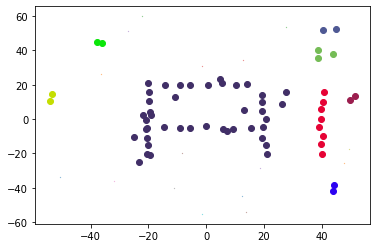

In [ ]:
import matplotlib.pyplot as plt
import itertools

for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)

---

## **PROBLEM 2: DBSCAN on toy raw data**

Three toy 2D datasets are provided (or they can be obtained easily with scikit learn) circles; blobs, and moons. Run your own implementaion of DBSCAN on these, in two phases.

---
### **Section A**
Run your own implementaion of DBSCAN on CIRCLES, in two phases.

In [ ]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/circle.csv', [0,1])

epsilon = 0.1
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]



[{0, 1, 3, 4, 5, 9, 11, 12, 14, 16, 24, 25, 28, 30, 31, 32, 33, 35, 36, 38, 41, 42, 43, 45, 46, 49, 54, 55, 58, 60, 61, 67, 69, 70, 72, 74, 77, 78, 79, 83, 84, 85, 87, 89, 92, 94, 96, 99, 100, 101, 103, 105, 106, 107, 108, 111, 113, 116, 119, 120, 121, 123, 125, 128, 129, 131, 132, 133, 134, 135, 138, 139, 141, 142, 153, 154, 155, 158, 160, 161, 162, 163, 164, 167, 170, 171, 173, 175, 177, 178, 180, 181, 184, 185, 186, 188, 190, 191, 194, 195, 196, 198, 200, 201, 203, 204, 205, 206, 207, 208, 209, 211, 213, 214, 215, 219, 220, 221, 222, 226, 227, 230, 232, 233, 236, 238, 240, 244, 249, 251, 253, 255, 256, 258, 260, 261, 264, 265, 266, 270, 271, 274, 275, 276, 277, 280, 283, 284, 286, 287, 290, 292, 293, 294, 296, 297, 306, 307, 309, 310, 311, 312, 314, 321, 322, 327, 329, 330, 331, 333, 337, 339, 340, 349, 351, 353, 354, 355, 357, 358, 366, 370, 373, 376, 377, 380, 383, 384, 385, 386, 389, 390, 393, 398, 400, 402, 404, 405, 408, 409, 410, 412, 413, 420, 421, 423, 425, 426, 429, 430, 43

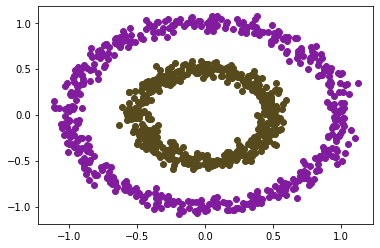

In [ ]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)


---
### **Section B**
Run your own implementaion of DBSCAN on BLOBS, in two phases.

In [ ]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/blobs.csv', [0,1])

epsilon = 0.4
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]


[{0, 3, 4, 5, 7, 8, 10, 11, 12, 15, 16, 19, 20, 21, 22, 23, 24, 26, 30, 34, 36, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 51, 54, 55, 56, 57, 59, 63, 64, 67, 69, 71, 73, 75, 76, 77, 78, 79, 83, 84, 85, 86, 90, 96, 97, 99, 100, 101, 102, 105, 106, 108, 109, 111, 113, 115, 118, 120, 121, 123, 124, 129, 131, 132, 133, 138, 140, 142, 144, 145, 147, 152, 153, 154, 155, 157, 166, 168, 169, 171, 173, 174, 175, 176, 177, 179, 180, 185, 186, 187, 189, 190, 191, 192, 194, 195, 196, 197, 199, 203, 204, 205, 206, 207, 208, 217, 218, 219, 221, 223, 225, 227, 228, 231, 233, 237, 242, 243, 245, 246, 247, 250, 251, 252, 253, 254, 255, 257, 259, 261, 262, 269, 270, 272, 276, 279, 282, 288, 289, 291, 292, 293, 294, 295, 296, 298, 300, 303, 304, 306, 309, 311, 313, 314, 315, 316, 322, 324, 330, 332, 333, 339, 341, 342, 343, 345, 350, 352, 354, 357, 358, 359, 361, 367, 370, 371, 377, 378, 382, 383, 384, 385, 387, 388, 393, 394, 396, 402, 404, 405, 406, 409, 410, 411, 412, 415, 416, 417, 419, 421, 422, 423, 

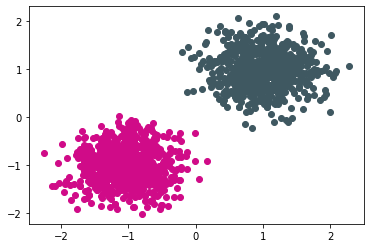

In [ ]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)


---
### **Section C**
Run your own implementaion of DBSCAN on MOON, in two phases.

In [ ]:
dataset = parse_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/moons.csv', [0,1])

epsilon = 0.2
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]

[{0, 1, 3, 6, 7, 8, 13, 14, 15, 18, 20, 21, 22, 23, 27, 31, 36, 37, 38, 39, 43, 44, 45, 47, 52, 54, 56, 57, 60, 61, 63, 66, 68, 70, 71, 74, 75, 77, 78, 81, 82, 83, 85, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 102, 106, 107, 108, 110, 111, 112, 113, 116, 119, 120, 121, 122, 123, 124, 126, 127, 132, 134, 135, 136, 137, 139, 140, 141, 144, 145, 146, 147, 149, 150, 152, 157, 159, 161, 162, 168, 169, 170, 173, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 193, 195, 197, 198, 199, 200, 201, 203, 205, 206, 207, 208, 211, 212, 215, 218, 221, 222, 223, 224, 225, 228, 229, 230, 233, 234, 238, 241, 244, 247, 249, 251, 252, 256, 258, 260, 261, 263, 265, 268, 275, 277, 278, 285, 287, 289, 291, 292, 293, 295, 299, 300, 301, 302, 303, 304, 305, 306, 309, 311, 313, 314, 318, 319, 320, 324, 326, 327, 330, 333, 334, 337, 340, 341, 342, 348, 352, 353, 358, 360, 361, 363, 364, 368, 370, 371, 373, 375, 376, 377, 378, 379, 380, 382, 383, 384, 386, 387, 389, 396, 398, 401, 406, 41

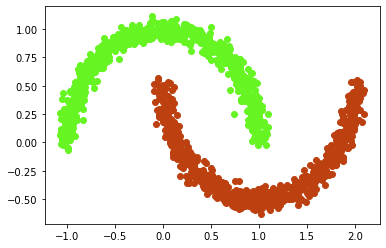

In [ ]:
toy_scan = bfs_dbscan(neighbours, minPT=3)
visited = toy_scan['visited']
clusters = toy_scan['clusters']
noise = toy_scan['noise']
print(clusters)


for cluster in clusters:
  c =  np.random.rand(len(clusters),3)
  c = c[np.random.choice(len(c))]
  for datapoint in cluster:
    x = dataset[datapoint][0]
    y = dataset[datapoint][1]
    plt.scatter(x, y, color = c)

c = c[np.random.choice(len(c))]
for ns in noise:
  x = dataset[ns][0]
  y = dataset[ns][1]
  plt.scatter(x, y, c)

---

## **PROBLEM 3: DBSCAN on real data**
Run the DBSCAN algorithm on the 20NG dataset, and on the FASHION dataset, and the HouseHold dataset (see papers), and evaluate results. 

You need to implement both phases (1) neighborhoods creation, (2) DBSCAN.

Explain why/when it works, and speculate why/when not. 

You need to do trial and error for parameters epsilon and MinPts

*   DBSCAN Revisited, Revisited: Why and How You Should (Still) Use DBSCAN
*   http://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/revisitofrevisitDBSCAN.pdf
*   DBSCAN Revisited:Mis-Claim, Un-Fixability, and Approximation
*   http://www.ccs.neu.edu/home/vip/teach/DMcourse/2_cluster_EM_mixt/notes_slides/sigmod15-dbscan.pdf

EXTRA CREDIT: Using class labels (cheating), try to remove/add points in curate the set for better DBSCAN runs

---
### **Section A**
Run your own implementaion of DBSCAN on 20ngNews, in two phases.

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

def fetch_data_20ng():
  newsgroups_train = fetch_20newsgroups(subset='train')
  vectorizer = TfidfVectorizer(stop_words='english',min_df=2)
  data_train = vectorizer.fit_transform(newsgroups_train.data)
  data_train = data_train.toarray()

  newsgroups_test = fetch_20newsgroups(subset='test')
  data_test = vectorizer.transform(newsgroups_test.data)
  data_test = data_test.toarray()
  target_train=newsgroups_train.target
  target_test=newsgroups_test.target
  ng20_data = np.concatenate((data_train, data_test), axis=0)
  ng20_label = np.concatenate((target_train, target_test), axis=0)
  return ng20_data[:1000], ng20_label[:1000]


In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA

# same normalization parameters just transform 

newsgroups_train, labels = fetch_data_20ng()
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_target = newsgroups_train.target
newsgroups_test = fetch_20newsgroups(subset='test')


newsgroups_train = fetch_20newsgroups(subset='train')
vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
newsgroups_train = vectorizer.fit_transform(newsgroups_train.data).todense()[0:1000]

# pca = PCA(n_components=10)
# pca.fit(newsgroups_train)
# print(pca.explained_variance_ra0tio_)
# print(pca.singular_values_)

print(len(newsgroups_train))
#ep = 1.5 minpt = 50 
epsilon = .45
discovery = neighbours_discovery(newsgroups_train, epsilon)
distances = discovery[0]
neighbours = discovery[1]
mean_dist = np.mean(distances)
print('The average distance between two datapoints', mean_dist)


ngnews_scan = bfs_dbscan(neighbours, minPT=50)
visited = ngnews_scan['visited']
clusters = ngnews_scan['clusters']
noise = ngnews_scan['noise']


gini = find_gini(newsgroups_target, clusters)

total_clustered = 0
for j in range(len(gini)):
  total_clustered = total_clustered + len(clusters[j])
  print('The gini coefficient for cluster ', j, ' is :', gini[j])

print('\n Out of the total dataset ( ', len(newsgroups_train),' points ), the total number of points clustered is ',total_clustered, ' pts.')

newsgroups_train = newsgroups_train
print('number of clusters for 20ngnews: ', len(clusters))


1000
The average distance between two datapoints 1.4036889858024708
The gini coefficient for cluster  0  is : 1.0
The gini coefficient for cluster  1  is : 1.0

 Out of the total dataset (  1000  points ), the total number of points clustered is  4  pts.
number of clusters for 20ngnews:  2


---
### **Section B**
Run your own implementaion of DBSCAN on Fashion, in two phases.

In [ ]:
from keras.datasets import fashion_mnist as fashion
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import normalize

(train_data, train_labels) , (test_data, test_labels)= fashion.load_data()

# reshape and normalize
# Mnist has a total of 70,000 data points (test + train)
# (70,000) datapoints is way too many 
# because the runtime for neighbour discovery is O(n^2)
# so I'm only using train data
test_data = np.reshape(test_data, (10000, 784))
test_data = normalize(test_data, norm ='max') [0:1000]

# 1-10, 1-50
epsilon = 9.5
discovery = neighbours_discovery(test_data, epsilon)
distances = discovery[0]
neighbours = discovery[1]
mean_dist = np.mean(distances)
print('The average distance between two datapoints',mean_dist)


fashion_scan = bfs_dbscan(neighbours, minPT=50)
visited = fashion_scan['visited']
clusters = fashion_scan['clusters']
noise = fashion_scan['noise']

gini = find_gini(test_labels, clusters)

for j in range(len(gini)):
  print('The gini coefficient for cluster ', j, ' is :', gini[j])

print('number of clusters for fashion data: ', len(clusters))

The average distance between two datapoints 11.344250756236285
The gini coefficient for cluster  0  is : 0.899251408628881
The gini coefficient for cluster  1  is : 1.0
The gini coefficient for cluster  2  is : 1.0
number of clusters for fashion data:  3


---
### **Section C**
Run your own implementaion of DBSCAN on Household, in two phases.

In [ ]:
def parse_household_data (infile, columns) -> np.array : 
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()[1:]

  dataset = []
  for line in lines[:10000]:
    if line:
      if '?' in line: continue
      features = line.split(';')
      datapoint_vector = []
      for c in columns:
        feature = float(features[c].strip('\'').strip('\"'))      
        datapoint_vector.append(feature)
          
      dataset.append(datapoint_vector)

  return np.array(dataset)

In [ ]:
dataset = parse_household_data('/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/household_power_consumption.txt', [2,3,4,5,6,7,8])

epsilon = 5
discovery = neighbours_discovery(dataset, epsilon)
distances = discovery[0]
neighbours = discovery[1]
mean_dist = np.mean(distances)
print('The average distance between two datapoints',mean_dist)

household_scan = bfs_dbscan(neighbours, minPT=3)
visited = household_scan['visited']
clusters = household_scan['clusters']
noise = household_scan['noise']

silhouette = find_silhouette(clusters, dataset)

for j in range(len(silhouette)):
  print('The silhouette coefficient for cluster ', j, ' is :', silhouette[j])

print('number of clusters for household data: ', len(clusters))


The average distance between two datapoints 16.75891300234331
The silhouette coefficient for cluster  0  is : 0.9765245188637041
The silhouette coefficient for cluster  1  is : 0.990415884038729
The silhouette coefficient for cluster  2  is : 0.9912228174468705
The silhouette coefficient for cluster  3  is : 0.994911499179692
The silhouette coefficient for cluster  4  is : 0.9969174408141298
The silhouette coefficient for cluster  5  is : 0.9963300084295571
The silhouette coefficient for cluster  6  is : 0.9971946239419888
The silhouette coefficient for cluster  7  is : 0.9975410105274006
The silhouette coefficient for cluster  8  is : 0.9966329498926904
The silhouette coefficient for cluster  9  is : 0.9936993908671804
The silhouette coefficient for cluster  10  is : 0.9983388699935608
The silhouette coefficient for cluster  11  is : 0.9987151885896384
The silhouette coefficient for cluster  12  is : 0.9984677967458215
number of clusters for household data:  13


---

## **PROBLEM 4: Hierarchical Clustering**

Use a library to execute hierarchical clustering on MNIST dataset, evaluate the clusters.

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# let's print the shape before we reshape and normalize
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)


11493376/11490434 [==============================] - 0s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


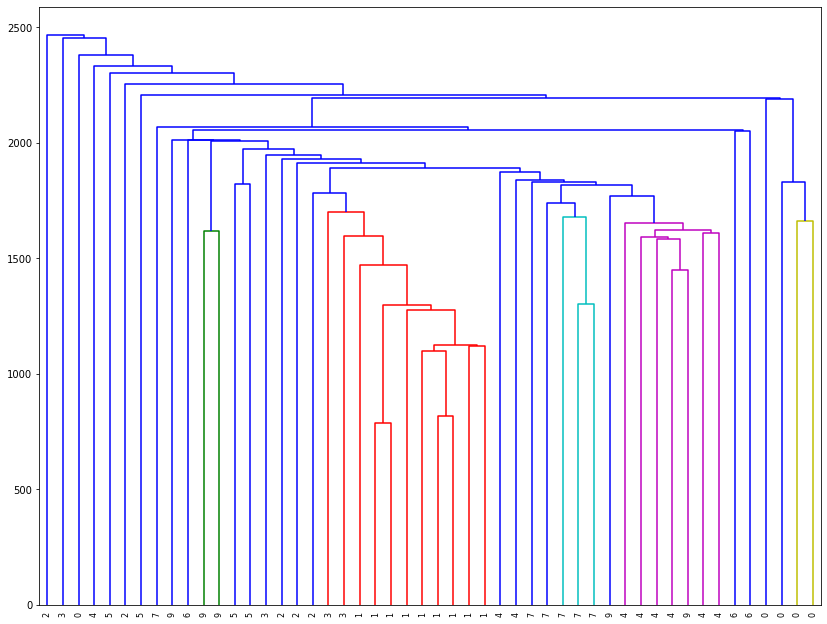

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

newsgroups_test = np.reshape(x_test, (10000, 784)) 
newsgroups_test = newsgroups_test[0:50]

linked = linkage(newsgroups_test, 'single')


plt.figure(figsize=(14, 11))
dendrogram(linked[:50],
            orientation='top',
            labels=y_test[0:50],
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()